In [102]:
#pip install --upgrade onn
#pip install -U imbalanced-learn

from pandas import read_csv
from memory_profiler import profile
# supresses future warnings 
import warnings                                                 
warnings.simplefilter(action='ignore')
import pandas as pd
import time
import warnings
from sklearn.metrics import confusion_matrix, classification_report, auc, precision_recall_curve, average_precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.models import Model, load_model
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# Import the matplotlib library for plotting
import matplotlib.pyplot as plt

# set plot style
plt.style.use('seaborn-whitegrid')

# Use the magic function to ensure plots render in a notebook
%matplotlib inline

# Import the seaborn library for plotting
import seaborn as sns

from onn.OnlineNeuralNetwork import ONN
from onn.OnlineNeuralNetwork import ONN_THS
from sklearn.datasets import make_classification, make_circles
from sklearn.model_selection import train_test_split
import torch
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from imblearn.datasets import make_imbalance
import numpy as np

In [2]:
dataset = pd.read_excel(r"GPS_data_balanced_main.xlsx")

In [3]:
dataset

,PRN,Carrier_Doppler_hz,Pseudorange_m,TOW_at_current_symbol_s,EC,LC,PC,PIP,PQP,TCD,CN0,Output
0,6,1161.135932,-2.383686e+05,491568.0408,184442.36000,193125.89000,208228.02000,-205198.3000,35391.590000,1157.690900,49.480145,0
1,6,1161.156617,-2.383734e+05,491568.0608,159812.45000,169960.55000,187550.72000,187543.0000,-1701.944000,1161.134300,49.433769,0
2,6,1160.690893,-2.383781e+05,491568.0808,183557.66000,191912.58000,208403.50000,208330.0500,-5532.899900,1161.175900,49.391670,0
3,6,1160.807697,-2.383827e+05,491568.1008,178968.47000,184958.66000,198938.81000,198488.9800,-13370.641000,1160.690800,49.290367,0
4,6,1163.400529,-2.383870e+05,491568.1208,168080.86000,173257.44000,185404.97000,-184959.5800,12843.657000,1160.693200,49.303074,0
...,...,...,...,...,...,...,...,...,...,...,...,...
325499,4,-1118.292665,1.949385e+06,264109.6735,85886.82813,61329.85938,87648.14844,-83954.3125,-25176.798830,-1102.504883,42.704288,0
325500,7,3545.894354,2.823758e+06,264109.6706,107531.35160,109082.07810,123142.29690,119616.3125,-29256.857420,3524.595703,46.334122,0
325501,9,1206.630594,1.298429e+06,264109.6757,141574.87500,139169.45310,156087.78130,156078.0938,-1738.840820,2778.508789,47.498169,3
325502,27,2815.545864,2.298911e+06,264109.6723,164279.40630,149921.35940,177528.12430,175577.5781,26244.027340,2786.775146,46.232616,3


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325504 entries, 0 to 325503
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   PRN                      325504 non-null  int64  
 1   Carrier_Doppler_hz       325504 non-null  float64
 2   Pseudorange_m            325504 non-null  float64
 3   TOW_at_current_symbol_s  325504 non-null  float64
 4   EC                       325504 non-null  float64
 5   LC                       325504 non-null  float64
 6   PC                       325504 non-null  float64
 7   PIP                      325504 non-null  float64
 8   PQP                      325504 non-null  float64
 9   TCD                      325504 non-null  float64
 10  CN0                      325504 non-null  float64
 11  Output                   325504 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 29.8 MB


# ONN

In [86]:
# split into input (X) and output (y) variables
X1 = dataset.drop('Output', axis=1)
y1 = dataset['Output']

X1 = X1.to_numpy()
y1 = y1.to_numpy()
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=8, shuffle=True)

In [87]:
onn_network = ONN(features_size=11, max_num_hidden_layers=5, qtd_neuron_per_hidden_layer=40, n_classes=11)

In [90]:
for i in range(len(X1_train)):
    onn_network.partial_fit(np.asarray([X1_train[i, :]]), np.asarray([y1_train[i]]))
    if i % 1000 == 0:
        predictions = onn_network.predict(X1_test)
        print("Online Accuracy: {}".format(balanced_accuracy_score(y1_test, predictions)))

Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Accuracy: 0.25
Online Acc


KeyboardInterrupt



In [91]:
predictions = onn_network.predict(X1_test)

ERROR: Could not find file <ipython-input-93-7739b4a029b3>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.
======ONN ======
TN : 59546
FP : 0
FN : 12554
TP : 0
 
Prob of Detection     : 0.0
 
Prob of False Alarm   : 0.0
 
Prob of Mis-Detection : 100.0
 
Overall accuracy      : 0.83

              precision    recall  f1-score   support

           0       0.61      1.00      0.76     59546
           1       0.00      0.00      0.00     12554
           2       0.00      0.00      0.00     13425
           3       0.00      0.00      0.00     12127

    accuracy                           0.61     97652
   macro avg       0.15      0.25      0.19     97652
weighted avg       0.37      0.61      0.46     97652

processing time 3.7
training time 0.07
training time per sample 3.072169653985921e-07
testing  time 0.01
Filename: C:\Users\Hamza\anaconda3\lib\site-packages\memory_profiler.py

Line #    Mem usage    Increment  Occurrences

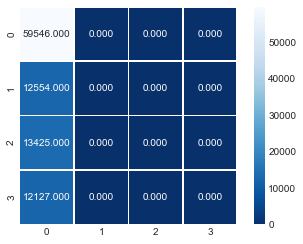

In [93]:
@profile
@profile

def my_func():
    
    time_a_1 = time.time()
    time_c_1 = time.time()
    
    
    # metrics calculation
    #pred1 = model.predict(X_test)   
    cm=confusion_matrix(y1_test, np.round(predictions))
    cm
    TN, FP, FN, TP = confusion_matrix(y1_test, np.round(predictions), labels=[0, 1]).ravel()

    
    
    print('======ONN ======')
    print('TN : {}\nFP : {}\nFN : {}\nTP : {}'.format(TN, FP, FN, TP))
    print(' ')
    
    
    time_d_1 = time.time()
    training_time_1 = round(time_d_1 - time_c_1,2)

    time_e_1 = time.time()
    
    
    
    # Probability of Detection
    prob_of_detect_1 = round((TP/(TP+FN))*100,2)
    print('Prob of Detection     : {}'.format(prob_of_detect_1))
    print(' ')
    # Probability of False Alarm
    prob_of_false_1 = round((FP/(FP+TN))*100,2)
    print('Prob of False Alarm   : {}'.format(prob_of_false_1))
    print(' ')
    # Probability of Mis-Detection
    prob_of_misdetect_1 = round((FN/(TP+FN))*100,2)
    print('Prob of Mis-Detection : {}'.format(prob_of_misdetect_1))
    print(' ')
    # Overall accuracy
    accuracy_1 = round((TP+TN)/(TP+FP+FN+TN),2)
    print('Overall accuracy      : {}'.format(accuracy_1))
    print("===============================\n")
    
    time_f_1 = time.time()
    testing_time_1 = round(time_f_1 - time_e_1,2)

    
    
    
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    print(classification_report(y1_test,np.round(predictions)))
    
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    
    fpr1, tpr1, threshold = roc_curve(np.round(predictions),y1_test)
    auc1 = auc(fpr1, tpr1)

    
    time_b_1 = time.time()
    processing_time_1 = round(time_b_1 - time_a_1,2)
    
    print('processing time', processing_time_1)
    print('training time', training_time_1)
    print('training time per sample', training_time_1 /len(X1_train))
    print('testing  time', testing_time_1)



    
if __name__ == '__main__':
    my_func()

# DNN

In [193]:
X= dataset .iloc[:, :-1].values
X = X.reshape(X.shape[0], X.shape[1], 1)
#X = dataset .iloc[:, :-1].values
Y = dataset .iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)
X_train.shape

(260403, 11, 1)

In [95]:
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(256, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(128,input_dim=input_dim, activation='relu'))
model.add(layers.Dense(64, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               3072      
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 44,885
Trainable params: 44,885
Non-trainable params: 0
_________________________________________________________________


In [96]:
# To display all metrics from training a model, just use this:
history = model.fit(X_train, y_train,epochs=10,verbose=1,validation_data=(X_test, y_test),batch_size=450)

Epoch 1/10
579/579 [==============================] - 38s 65ms/step - loss: 106.3723 - accuracy: 0.1300 - val_loss: 0.5863 - val_accuracy: 0.1282
Epoch 2/10
579/579 [==============================] - 37s 63ms/step - loss: 0.5638 - accuracy: 0.1284 - val_loss: 0.5455 - val_accuracy: 0.1282
Epoch 3/10
579/579 [==============================] - 29s 50ms/step - loss: 0.5404 - accuracy: 0.1284 - val_loss: 0.5335 - val_accuracy: 0.1282
Epoch 4/10
579/579 [==============================] - 28s 49ms/step - loss: 0.5343 - accuracy: 0.1284 - val_loss: 0.5307 - val_accuracy: 0.1282
Epoch 5/10
579/579 [==============================] - 28s 49ms/step - loss: 0.5331 - accuracy: 0.1284 - val_loss: 0.5302 - val_accuracy: 0.1282
Epoch 6/10
579/579 [==============================] - 32s 55ms/step - loss: 0.5330 - accuracy: 0.1284 - val_loss: 0.5302 - val_accuracy: 0.1282
Epoch 7/10
579/579 [==============================] - 28s 49ms/step - loss: 0.5330 - accuracy: 0.1284 - val_loss: 0.5302 - val_accurac

ERROR: Could not find file <ipython-input-97-7f777db743ce>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.
2035/2035 [==============================] - 99s 49ms/step
======DNN ======
TN : 0
FP : 39685
FN : 0
TP : 8346
 
Prob of Detection     : 100.0
 
Prob of False Alarm   : 100.0
 
Prob of Mis-Detection : 0.0
 
Overall accuracy      : 0.17

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     39685
           1       0.13      1.00      0.23      8346
           2       0.00      0.00      0.00      8945
           3       0.00      0.00      0.00      8125

    accuracy                           0.13     65101
   macro avg       0.03      0.25      0.06     65101
weighted avg       0.02      0.13      0.03     65101



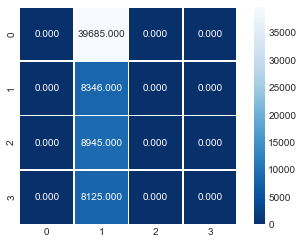

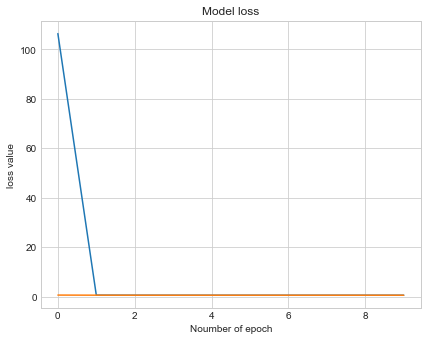

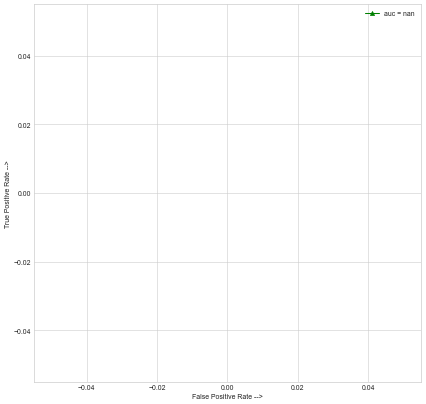

processing time 114.93
training time 106.32
training time per sample 0.00040829022707111664
testing  time 0.01
Filename: C:\Users\Hamza\anaconda3\lib\site-packages\memory_profiler.py

Line #    Mem usage    Increment  Occurrences   Line Contents
  1183   1119.9 MiB   1119.9 MiB           1               @wraps(wrapped=func)
  1184                                                     def wrapper(*args, **kwargs):
  1185   1119.9 MiB      0.0 MiB           1                   prof = get_prof()
  1186   1124.6 MiB      4.7 MiB           1                   val = prof(func)(*args, **kwargs)
  1187   1124.6 MiB      0.0 MiB           1                   show_results_bound(prof)
  1188   1124.6 MiB      0.0 MiB           1                   return val




In [97]:
@profile
@profile

def my_func():
    
    time_a_1 = time.time()
    time_c_1 = time.time()
    
    
    # metrics calculation
    pred1 = model.predict(X_test)   
    cm=confusion_matrix(y_test, np.round(pred1))
    cm
    TN, FP, FN, TP = confusion_matrix(y_test, np.round(pred1), labels=[0, 1]).ravel()

    
    
    print('======DNN ======')
    print('TN : {}\nFP : {}\nFN : {}\nTP : {}'.format(TN, FP, FN, TP))
    print(' ')
    
    
    time_d_1 = time.time()
    training_time_1 = round(time_d_1 - time_c_1,2)

    time_e_1 = time.time()
    
    
    
    # Probability of Detection
    prob_of_detect_1 = round((TP/(TP+FN))*100,2)
    print('Prob of Detection     : {}'.format(prob_of_detect_1))
    print(' ')
    # Probability of False Alarm
    prob_of_false_1 = round((FP/(FP+TN))*100,2)
    print('Prob of False Alarm   : {}'.format(prob_of_false_1))
    print(' ')
    # Probability of Mis-Detection
    prob_of_misdetect_1 = round((FN/(TP+FN))*100,2)
    print('Prob of Mis-Detection : {}'.format(prob_of_misdetect_1))
    print(' ')
    # Overall accuracy
    accuracy_1 = round((TP+TN)/(TP+FP+FN+TN),2)
    print('Overall accuracy      : {}'.format(accuracy_1))
    print("===============================\n")
    
    time_f_1 = time.time()
    testing_time_1 = round(time_f_1 - time_e_1,2)

    
    
    
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    print(classification_report(y_test,np.round(pred1)))
    
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    losses=history.history['loss']
    val_losses=history.history['val_loss']
    fig = plt.figure(figsize=(15,18))
    plt.subplot(3, 2, 1)
    plt.plot(losses, label='Training loss')
    plt.plot(val_losses, label='Validation loss')
    plt.title('Model loss')
    plt.ylabel('loss value')
    plt.xlabel('Noumber of epoch')
    plt.show()
    
    fpr1, tpr1, threshold = roc_curve(np.round(pred1),y_test)
    auc1 = auc(fpr1, tpr1)

    plt.figure(figsize=(10, 10), dpi=50)
    plt.plot(fpr1, tpr1, marker='^',color = "g", label='auc = %0.2f' % auc1)
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()
    
    
    time_b_1 = time.time()
    processing_time_1 = round(time_b_1 - time_a_1,2)
    
    print('processing time', processing_time_1)
    print('training time', training_time_1)
    print('training time per sample', training_time_1 /len(X_train))
    print('testing  time', testing_time_1)


    
if __name__ == '__main__':
    my_func()

# UNET

In [194]:
IMG_HEIGHT=128
IMG_WIDTH=128
IMG_CHANNELS=1

X_train = np.zeros((len(X_train[:100]), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
X_test = np.zeros((len(X_test[:100]), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)

Y_train = np.zeros((len(y_train[:100]), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
Y_test = np.zeros((len(y_test[:100]), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

In [195]:
X_train.shape

(100, 128, 128, 1)

In [100]:
def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
    """Function to add 2 convolutional layers with the parameters passed to it"""
    # first layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # second layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x

In [101]:
def get_unet(input_img, n_filters = 16, dropout = 0.1, batchnorm = True):
    """Function to define the UNET Model"""
    # Contracting Path
    c1 = conv2d_block(input_img, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(dropout)(p1)
    
    c2 = conv2d_block(p1, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(dropout)(p2)
    
    c3 = conv2d_block(p2, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(dropout)(p3)
    
    c4 = conv2d_block(p3, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = conv2d_block(p4, n_filters = n_filters * 16, kernel_size = 3, batchnorm = batchnorm)
    
    # Expansive Path
    u6 = Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    
    u7 = Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    
    u8 = Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    
    u9 = Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = concatenate([u9, c1])
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    model = Model(inputs=[input_img], outputs=[outputs])
    return model

In [103]:
input_img = Input((128, 128, 1), name='img')
model = get_unet(input_img, n_filters=16, dropout=0.05, batchnorm=True)
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])


In [104]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_20 (Conv2D)             (None, 128, 128, 16  160         ['img[0][0]']                    
                                )                                                                 
                                                                                                  
 batch_normalization_19 (BatchN  (None, 128, 128, 16  64         ['conv2d_20[0][0]']              
 ormalization)                  )                                                           

                                                                                                  
 batch_normalization_31 (BatchN  (None, 32, 32, 64)  256         ['conv2d_32[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_31 (Activation)     (None, 32, 32, 64)   0           ['batch_normalization_31[0][0]'] 
                                                                                                  
 conv2d_transpose_6 (Conv2DTran  (None, 64, 64, 32)  18464       ['activation_31[0][0]']          
 spose)                                                                                           
                                                                                                  
 concatenate_6 (Concatenate)    (None, 64, 64, 64)   0           ['conv2d_transpose_6[0][0]',     
          

In [105]:
tf.config.experimental_run_functions_eagerly(True)

results = model.fit(X_train, Y_train, batch_size=32, epochs=10,
                    
                    validation_data=(X_test, Y_test))

Epoch 1/10
4/4 [==============================] - 2s 500ms/step - loss: 0.6926 - accuracy: 1.0000 - val_loss: 0.6911 - val_accuracy: 1.0000
Epoch 2/10
4/4 [==============================] - 2s 475ms/step - loss: 0.6906 - accuracy: 1.0000 - val_loss: 0.6892 - val_accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 2s 478ms/step - loss: 0.6886 - accuracy: 1.0000 - val_loss: 0.6872 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 2s 469ms/step - loss: 0.6866 - accuracy: 1.0000 - val_loss: 0.6852 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 2s 471ms/step - loss: 0.6846 - accuracy: 1.0000 - val_loss: 0.6832 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 2s 475ms/step - loss: 0.6827 - accuracy: 1.0000 - val_loss: 0.6812 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 2s 479ms/step - loss: 0.6807 - accuracy: 1.0000 - val_loss: 0.6793 - val_accuracy: 1.0000
Epoch 8/10
4/4 [====

ERROR: Could not find file <ipython-input-176-7f9f59a196fd>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.
processing time 0.72
training time 1050
training time per sample 0.003225766810853323
Filename: C:\Users\Hamza\anaconda3\lib\site-packages\memory_profiler.py

Line #    Mem usage    Increment  Occurrences   Line Contents
  1183   1351.1 MiB   1351.1 MiB           1               @wraps(wrapped=func)
  1184                                                     def wrapper(*args, **kwargs):
  1185   1351.1 MiB      0.0 MiB           1                   prof = get_prof()
  1186   1351.1 MiB      0.1 MiB           1                   val = prof(func)(*args, **kwargs)
  1187   1351.1 MiB      0.0 MiB           1                   show_results_bound(prof)
  1188   1351.1 MiB      0.0 MiB           1                   return val




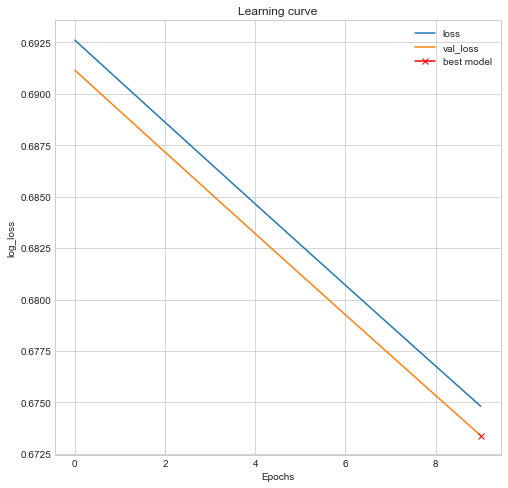

In [176]:
@profile
@profile

def my_func():
    
    time_a_1 = time.time()
    time_c_1 = time.time()
    plt.figure(figsize=(8, 8))
    plt.title("Learning curve")
    plt.plot(results.history["loss"], label="loss")
    plt.plot(results.history["val_loss"], label="val_loss")
    plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
    plt.xlabel("Epochs")
    plt.ylabel("log_loss")
    plt.legend();
    time_b_1 = time.time()
    processing_time_1 = round(time_b_1 - time_a_1,2)
          
    print('processing time', processing_time_1)
    print('training time', training_time_1)
    print('training time per sample', training_time_1 /len(X))


    
if __name__ == '__main__':
    my_func()

In [196]:
# Predict on train, val and test
preds_train = model.predict(X_train, verbose=1)
preds_val = model.predict(X_test, verbose=1)

4/4 [==============================] - 0s 99ms/step


In [184]:
# predict 
pred = model.predict(preds_train, batch_size = 32)
pred = np.argmax(pred, axis=1)
# label
y_train = np.argmax(y_train, axis=1)

4/4 [==============================] - 0s 100ms/step


In [187]:
print(y_train.shape, pred.shape)

(260403,) (100, 128, 1)


In [197]:
preds_val = preds_val.reshape(100*128*128*1)

preds_val.shape

(1638400,)

In [202]:
cm=confusion_matrix( y_test[:100], np.round(preds_val)[:100])
cm


array([[62,  0,  0,  0],
       [12,  0,  0,  0],
       [16,  0,  0,  0],
       [10,  0,  0,  0]], dtype=int64)

ERROR: Could not find file <ipython-input-206-18e6af93f9d5>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.
4/4 [==============================] - 1s 351ms/step
======DNN ======
TN : 62
FP : 0
FN : 12
TP : 0
 
Prob of Detection     : 100.0
 
Prob of False Alarm   : 0.0
 
Prob of Mis-Detection : 0.0
 
Overall accuracy      : 0.84

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        62
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        10

    accuracy                           0.62       100
   macro avg       0.15      0.25      0.19       100
weighted avg       0.38      0.62      0.47       100



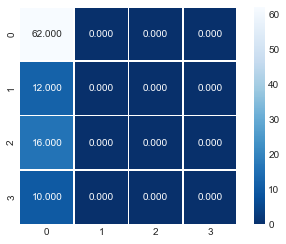

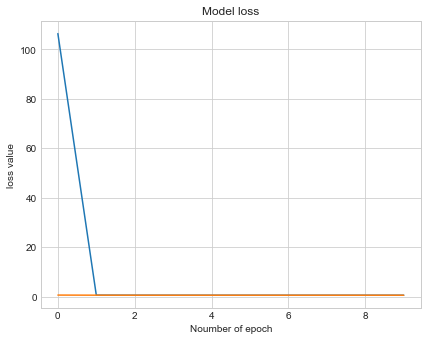

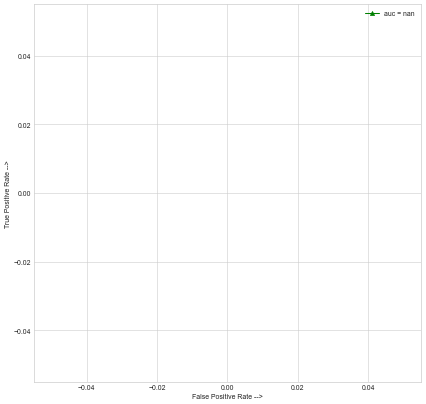

processing time 13.73
training time 3.95
training time per sample 0.0395
testing  time 0.01
Filename: C:\Users\Hamza\anaconda3\lib\site-packages\memory_profiler.py

Line #    Mem usage    Increment  Occurrences   Line Contents
  1183   1056.6 MiB   1056.6 MiB           1               @wraps(wrapped=func)
  1184                                                     def wrapper(*args, **kwargs):
  1185   1056.6 MiB      0.0 MiB           1                   prof = get_prof()
  1186   1059.0 MiB      2.3 MiB           1                   val = prof(func)(*args, **kwargs)
  1187   1059.0 MiB      0.0 MiB           1                   show_results_bound(prof)
  1188   1059.0 MiB      0.0 MiB           1                   return val




In [206]:
@profile
@profile

def my_func():
    
    time_a_1 = time.time()
    time_c_1 = time.time()
    
    
    # metrics calculation
    # Predict on train, val and test
    preds_train = model.predict(X_train, verbose=1)
    preds_val = model.predict(X_test, verbose=1)
    preds_val = preds_val.reshape(100*128*128*1)
    
    
    cm=confusion_matrix(y_test[:100], np.round(preds_val)[:100][:100])
    cm
    TN, FP, FN, TP = confusion_matrix(y_test[:100], np.round(preds_val)[:100], labels=[0, 1]).ravel()

    
    
    print('======DNN ======')
    print('TN : {}\nFP : {}\nFN : {}\nTP : {}'.format(TN, FP, FN, TP))
    print(' ')
    
    
    time_d_1 = time.time()
    training_time_1 = round(time_d_1 - time_c_1,2)

    time_e_1 = time.time()
    
    
    
    # Probability of Detection
    prob_of_detect_1 = round((FN/(TP+FN))*100,2)
    print('Prob of Detection     : {}'.format(prob_of_detect_1))
    print(' ')
    # Probability of False Alarm
    prob_of_false_1 = round((FP/(FP+TN))*100,2)
    print('Prob of False Alarm   : {}'.format(prob_of_false_1))
    print(' ')
    # Probability of Mis-Detection
    prob_of_misdetect_1 = round((TP/(TP+FN))*100,2)
    print('Prob of Mis-Detection : {}'.format(prob_of_misdetect_1))
    print(' ')
    # Overall accuracy
    accuracy_1 = round((TP+TN)/(TP+FP+FN+TN),2)
    print('Overall accuracy      : {}'.format(accuracy_1))
    print("===============================\n")
    
    time_f_1 = time.time()
    testing_time_1 = round(time_f_1 - time_e_1,2)

    
    
    
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    print(classification_report(y_test[:100], np.round(preds_val)[:100]))
    
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    losses=history.history['loss']
    val_losses=history.history['val_loss']
    fig = plt.figure(figsize=(15,18))
    plt.subplot(3, 2, 1)
    plt.plot(losses, label='Training loss')
    plt.plot(val_losses, label='Validation loss')
    plt.title('Model loss')
    plt.ylabel('loss value')
    plt.xlabel('Noumber of epoch')
    plt.show()
    
    fpr1, tpr1, threshold = roc_curve(np.round(preds_val)[:100] , y_test[:100])
    auc1 = auc(fpr1, tpr1)

    plt.figure(figsize=(10, 10), dpi=50)
    plt.plot(fpr1, tpr1, marker='^',color = "g", label='auc = %0.2f' % auc1)
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()
    
    
    time_b_1 = time.time()
    processing_time_1 = round(time_b_1 - time_a_1,2)
    
    print('processing time', processing_time_1)
    print('training time', training_time_1)
    print('training time per sample', training_time_1 /len(X_train))
    print('testing  time', testing_time_1)


    
if __name__ == '__main__':
    my_func()

# RBF

In [50]:
from keras.layers import Layer
from keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
#         print(input_shape)
#         print(self.units)
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [59]:
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.losses import binary_crossentropy

model = Sequential()
model.add(Flatten(input_shape=(11, 1)))
model.add(RBFLayer(10, 0.5))
model.add(Dense(1, activation='sigmoid', name='foo'))

model.compile(optimizer='rmsprop', loss=binary_crossentropy, metrics=["accuracy"])

In [60]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 11)                0         
                                                                 
 rbf_layer_2 (RBFLayer)      (None, 10)                110       
                                                                 
 foo (Dense)                 (None, 1)                 11        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [73]:
history = model.fit(X, Y, batch_size=256, epochs=10)

Epoch 1/10
1272/1272 [==============================] - 57s 45ms/step - loss: 0.5324 - accuracy: 0.1284
Epoch 2/10
1272/1272 [==============================] - 66s 52ms/step - loss: 0.5324 - accuracy: 0.1284
Epoch 3/10
1272/1272 [==============================] - 57s 45ms/step - loss: 0.5324 - accuracy: 0.1284
Epoch 4/10
1272/1272 [==============================] - 59s 46ms/step - loss: 0.5324 - accuracy: 0.1284
Epoch 5/10
1272/1272 [==============================] - 57s 45ms/step - loss: 0.5324 - accuracy: 0.1284
Epoch 6/10
1272/1272 [==============================] - 55s 44ms/step - loss: 0.5324 - accuracy: 0.1284
Epoch 7/10
1272/1272 [==============================] - 54s 43ms/step - loss: 0.5324 - accuracy: 0.1284
Epoch 8/10
1272/1272 [==============================] - 53s 42ms/step - loss: 0.5324 - accuracy: 0.1284
Epoch 9/10
1272/1272 [==============================] - 54s 42ms/step - loss: 0.5324 - accuracy: 0.1284
Epoch 10/10
1272/1272 [==============================] - 54s 43m

ERROR: Could not find file <ipython-input-85-2c7e10051e0d>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.
10172/10172 [==============================] - 360s 35ms/step
======RBF ======
TN : 0
FP : 198751
FN : 0
TP : 41780
 
Prob of Detection     : 100.0
 
Prob of False Alarm   : 100.0
 
Prob of Mis-Detection : 0.0
 
Overall accuracy      : 0.17

              precision    recall  f1-score   support

           0       0.00      0.00      0.00    198751
           1       0.13      1.00      0.23     41780
           2       0.00      0.00      0.00     44232
           3       0.00      0.00      0.00     40741

    accuracy                           0.13    325504
   macro avg       0.03      0.25      0.06    325504
weighted avg       0.02      0.13      0.03    325504



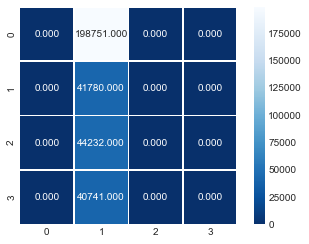

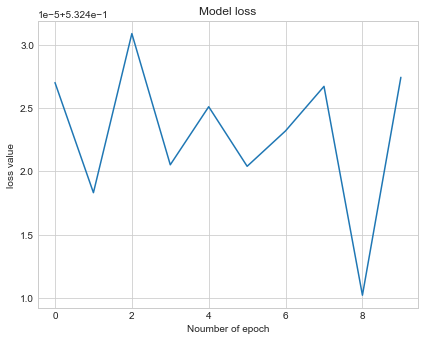

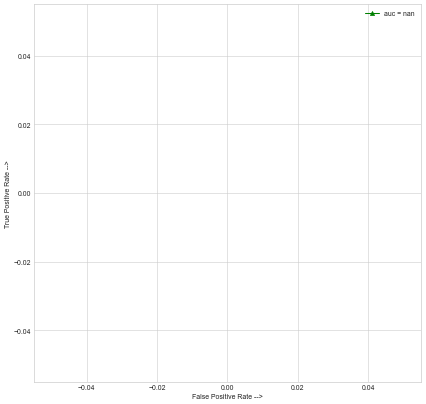

processing time 432.47
training time 421.2
training time per sample 0.0012939933149823044
testing  time 0.01
Filename: C:\Users\Hamza\anaconda3\lib\site-packages\memory_profiler.py

Line #    Mem usage    Increment  Occurrences   Line Contents
  1183   1000.0 MiB   1000.0 MiB           1               @wraps(wrapped=func)
  1184                                                     def wrapper(*args, **kwargs):
  1185   1000.0 MiB      0.0 MiB           1                   prof = get_prof()
  1186    953.3 MiB    -46.7 MiB           1                   val = prof(func)(*args, **kwargs)
  1187    953.3 MiB      0.0 MiB           1                   show_results_bound(prof)
  1188    953.3 MiB      0.0 MiB           1                   return val




In [85]:
@profile
@profile

def my_func():
    
    time_a_1 = time.time()
    time_c_1 = time.time()
    
    
    # metrics calculation
    pred1 = model.predict(X)   
    cm=confusion_matrix(Y, np.round(pred1))
    cm
    TN, FP, FN, TP = confusion_matrix(Y, np.round(pred1), labels=[0, 1]).ravel()

    
    
    print('======RBF ======')
    print('TN : {}\nFP : {}\nFN : {}\nTP : {}'.format(TN, FP, FN, TP))
    print(' ')
    
    
    time_d_1 = time.time()
    training_time_1 = round(time_d_1 - time_c_1,2)

    time_e_1 = time.time()
    
    
    
    # Probability of Detection
    prob_of_detect_1 = round((TP/(TP+FN))*100,2)
    print('Prob of Detection     : {}'.format(prob_of_detect_1))
    print(' ')
    # Probability of False Alarm
    prob_of_false_1 = round((FP/(FP+TN))*100,2)
    print('Prob of False Alarm   : {}'.format(prob_of_false_1))
    print(' ')
    # Probability of Mis-Detection
    prob_of_misdetect_1 = round((FN/(TP+FN))*100,2)
    print('Prob of Mis-Detection : {}'.format(prob_of_misdetect_1))
    print(' ')
    # Overall accuracy
    accuracy_1 = round((TP+TN)/(TP+FP+FN+TN),2)
    print('Overall accuracy      : {}'.format(accuracy_1))
    print("===============================\n")
    
    time_f_1 = time.time()
    testing_time_1 = round(time_f_1 - time_e_1,2)

    
    
    
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    print(classification_report(Y,np.round(pred1)))
    
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    losses=history.history['loss']
    fig = plt.figure(figsize=(15,18))
    plt.subplot(3, 2, 1)
    plt.plot(losses, label='Training loss')
    plt.title('Model loss')
    plt.ylabel('loss value')
    plt.xlabel('Noumber of epoch')
    plt.show()
    
    fpr1, tpr1, threshold = roc_curve(np.round(pred1),Y)
    auc1 = auc(fpr1, tpr1)

    plt.figure(figsize=(10, 10), dpi=50)
    plt.plot(fpr1, tpr1, marker='^',color = "g", label='auc = %0.2f' % auc1)
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()
    
    
    time_b_1 = time.time()
    processing_time_1 = round(time_b_1 - time_a_1,2)
          
    print('processing time', processing_time_1)
    print('training time', training_time_1)
    print('training time per sample', training_time_1 /len(X))
    print('testing  time', testing_time_1)


    
if __name__ == '__main__':
    my_func()